# Part II - Ford GoBike System Data
## by Hassani Imane


## Investigation Overview

In this study, I aimed to examine the usage patterns of the Ford GoBike System Data and identify factors that could affect the duration of bike trips. The primary emphasis was on the variables that could influence bike trip duration, including start time, user type, and bike sharing option.

A summary of key insights:

Subscribed members take a higher number of rides during weekdays compared to weekends. This trend is consistent across all genders. In contrast, the number of customer riders is significantly lower than that of subscribed riders and looks uniform across all weekdays. This suggests that customers may be using the bike-sharing service more for leisure or recreational purposes, while subscribers may be using it more for practical purposes like commuting to work.

Riders take a higher number of rides during peak hours, specifically between 7-9 AM and 4-6 PM. This suggests that men may be more likely to use the bike-sharing service for commuting to work or other daily activities.




## Dataset Overview

The Ford GoBike System dataset contains information on bike trips taken using the Ford GoBike bike-sharing system in the San Francisco Bay Area. The data covers the period of feb 2019 with 183412 row and 16 columns, it includes information such as the start and end time of the trip, the start and end stations, the duration of the trip, and the user type (either a subscriber or a customer). Additionally, some demographic information about the users is available, including their age, gender, and the bike they used.

In [1]:
#upgrading seaborn Package so seaborn.histplot and other functions will be available
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


In [2]:
!pip install nbconvert

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a #Loadin Bike dataset
df_original=pd.read_csv('201902-fordgobike-tripdata.csv')
# make q copy of original datasets
df_bike = df_original.copy()


In [5]:
# drop the none interesting columns
df_bike.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis = 1 , inplace = True)
#droping null values
df_bike.dropna(how = 'any', axis = 0, inplace=True)

In [6]:
# change bike_share_for_all_trip and user_type and member_gender datatype into category
df_bike.user_type = df_bike.user_type.astype('category')
df_bike.member_gender = df_bike.member_gender.astype('category')
df_bike.bike_share_for_all_trip = df_bike.bike_share_for_all_trip.astype('category')

# change ids from float64 to object (str)
df_bike.start_station_id = df_bike.start_station_id.astype(object)
df_bike.end_station_id = df_bike.end_station_id.astype(object)
df_bike.bike_id = df_bike.bike_id.astype(object)

# change member_birth_year from float64 to int
df_bike.member_birth_year = df_bike.member_birth_year.astype(int)

#change start_time and end_time types from object to datetime
df_bike.start_time = pd.to_datetime(df_bike.start_time)
df_bike.end_time = pd.to_datetime(df_bike.end_time)

# Creating columns: start_day start_hour (we didn't create start month because all rides start in february)
# use strftime() method to scrap the time data

# df_bike['start_month'] = df_bike['start_time'].apply(lambda x: x.strftime('%b')).astype('category')

df_bike['start_day'] = df_bike['start_time'].apply(lambda x: x.strftime('%A')).astype('category')

df_bike['start_hour'] = df_bike['start_time'].apply(lambda x: x.strftime('%H')).astype(int)

# Creating column member_age (and replace member_birth_year):
# Lets calcluate the member age from the birthyear
df_bike['member_age'] = (2019 - df_bike['member_birth_year']).astype(int)

# time characteristic order
day_order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_order = np.arange(0,24)

## Relationship between the Day of starting the ride and the User Type

The data shows that Subscribed Members take a significantly higher number of rides during weekdays, whereas on weekends, the number decreases significantly. However, the behavior of Customer Riders is quite different as their number of rides remains relatively uniform across all weekdays. This could indicate that Customer Riders may be using bikes for recreational purposes, while Subscribed Members are more likely to use bikes for commuting or transportation purposes during the weekdays. Another interesting observation is that the number of Customer Riders is significantly lower than that of Subscribed Riders. This could be due to the fact that Subscribed Members get better deals, such as discounted prices or exclusive access to bikes, which makes it more attractive for them to use bikes as their primary mode of transportation

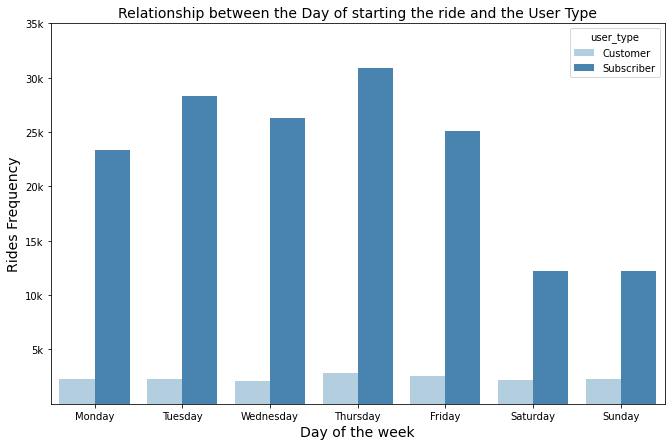

In [7]:
fig, ax = plt.subplots(figsize=(11, 7))

sb.countplot(data = df_bike, x = 'start_day', hue = 'user_type', palette = 'Blues', ax=ax, order = day_order)



# title and labels
           
ax.set_xlabel("Day of the week",fontsize=14)
ax.set_ylabel('Rides Frequency',fontsize=14)
ax.set_title('Relationship between the Day of starting the ride and the User Type',fontsize=14)
plt.yticks([5000, 10e3, 15e3, 20e3, 25e3, 30e3, 35e3], ['5k', '10k', '15k', '20k', '25k', '30k', '35k'])

# show the plot
plt.show()

## Relationship between the Hour of starting the ride and User Type

The data shows that riders are taking a higher number of rides during peak hours, specifically between 7-9 AM and 4-6 PM. This could indicate that most riders are using bikes for commuting purposes, as these are the typical rush hours when people are traveling to and from work or school. Another interesting observation is that the majority of users are subscribers, with the number being approximately more than 9 times higher than the number of customers. This suggests that the bike-sharing service may be more attractive to people who use bikes regularly, such as commuters or frequent travelers, rather than occasional or recreational riders. Understanding the relationship between the hour of starting the ride and user type is crucial to optimizing the bike-sharing service and providing the best experience to all users.

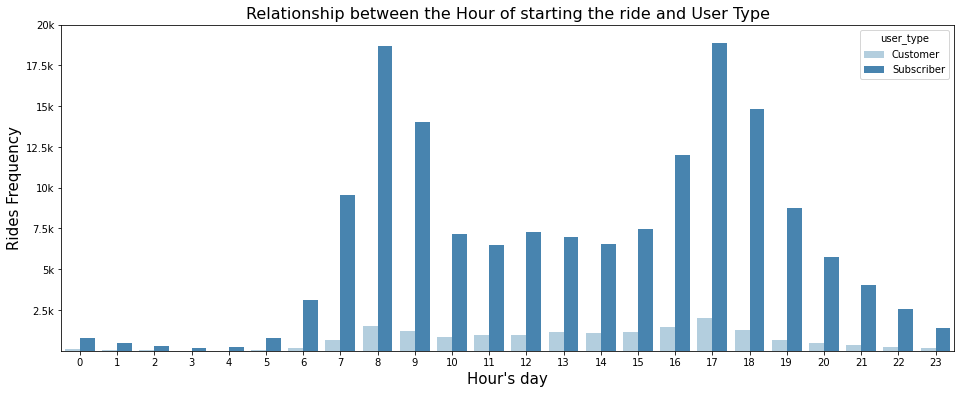

In [8]:
fig, ax = plt.subplots(figsize=(17, 6))
sb.countplot(data = df_bike, x = 'start_hour', hue = 'user_type', palette = 'Blues', ax=ax, order = hour_order);


# create a countplot on the first axis

# customize the plot
ax.set_xlabel("Hour's day",fontsize=15)
ax.set_ylabel('Rides Frequency',fontsize=15)
ax.set_title('Relationship between the Hour of starting the ride and User Type',fontsize=16)


plt.yticks([2500, 5e3, 75e2, 10e3, 125e2, 15e3, 175e2, 20e3], ['2.5k', '5k', '7.5k', '10k', '12.5k', '15k', '17.5k', '20k'])

plt.show()

## Relationship between the day of starting the ride and bike share for all trip Option

The data shows that the peak hours for using the bike-sharing system are from 7 to 9 AM and 4 to 6 PM, which is the typical working schedule time for most people. During these hours, the demand for bikes is significantly higher as people use them to commute to and from work or school. On the other hand, the bike-sharing system is least used during the hours of 11 PM to 5 AM when most people are sleeping. This indicates that the bike-sharing system is primarily used for transportation purposes rather than leisure or recreational purposes, as people are not using it during non-working hours. Understanding the relationship between the day of starting the ride and bike share for all trip option is important to optimize the bike-sharing system and provide the best service to users.

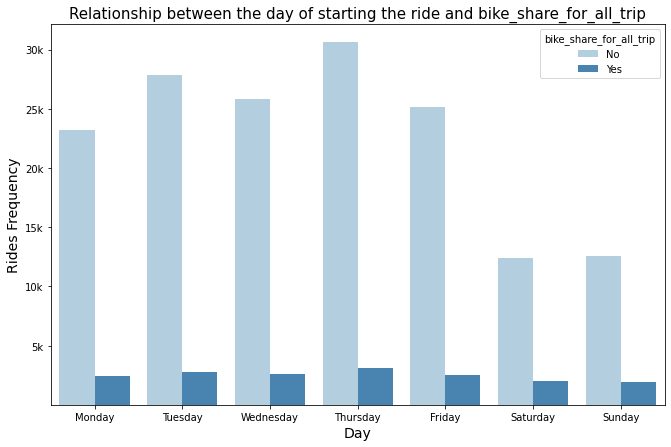

In [9]:
## Relationship between the bike sharing and the starting hour or day of the ride
fig, ax = plt.subplots(figsize=(11, 7))
sb.countplot(data = df_bike, x = 'start_day', hue = 'bike_share_for_all_trip', palette = 'Blues', ax=ax, order = day_order);


# create a countplot on the axis

# customize the plot
ax.set_xlabel("Day",fontsize=14)
ax.set_ylabel('Rides Frequency',fontsize=14)
ax.set_title('Relationship between the day of starting the ride and bike_share_for_all_trip',fontsize=15)

plt.yticks([5000, 10e3, 15e3, 20e3, 25e3, 30e3], ['5k', '10k', '15k','20k', '25k', '30k'])

#
plt.show()

In [12]:
!jupyter nbconvert Part_II_notebook.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_notebook.ipynb to slides
[NbConvertApp] Writing 359628 bytes to Part_II_notebook.slides.html
